In [20]:
import pickle
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [21]:
# load the mat and dist in 11_calibrate_your_camera
dist_pickle = pickle.load(open('wide_dist_pickle.p', 'rb'))
dist_pickle

{'mtx': array([[560.33148363,   0.        , 651.26264911],
        [  0.        , 561.3767079 , 499.06540191],
        [  0.        ,   0.        ,   1.        ]]),
 'objpoints': [array([[0., 0., 0.],
         [1., 0., 0.],
         [2., 0., 0.],
         [3., 0., 0.],
         [4., 0., 0.],
         [5., 0., 0.],
         [6., 0., 0.],
         [7., 0., 0.],
         [0., 1., 0.],
         [1., 1., 0.],
         [2., 1., 0.],
         [3., 1., 0.],
         [4., 1., 0.],
         [5., 1., 0.],
         [6., 1., 0.],
         [7., 1., 0.],
         [0., 2., 0.],
         [1., 2., 0.],
         [2., 2., 0.],
         [3., 2., 0.],
         [4., 2., 0.],
         [5., 2., 0.],
         [6., 2., 0.],
         [7., 2., 0.],
         [0., 3., 0.],
         [1., 3., 0.],
         [2., 3., 0.],
         [3., 3., 0.],
         [4., 3., 0.],
         [5., 3., 0.],
         [6., 3., 0.],
         [7., 3., 0.],
         [0., 4., 0.],
         [1., 4., 0.],
         [2., 4., 0.],
         [3., 4.,

In [22]:
mtx = dist_pickle['mtx']
mtx

array([[560.33148363,   0.        , 651.26264911],
       [  0.        , 561.3767079 , 499.06540191],
       [  0.        ,   0.        ,   1.        ]])

In [23]:
dist = dist_pickle['dist']
dist

array([[-2.32949182e-01,  6.17242707e-02, -1.80423444e-05,
         3.39635746e-05, -7.54961807e-03]])

In [24]:
img = cv2.imread('test_image2.jpg')
img.shape

(960, 1280, 3)

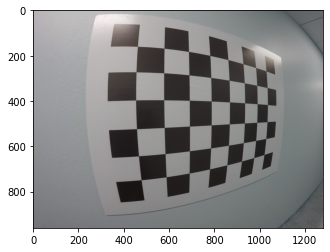

In [25]:
plt.imshow(img)

In [26]:
nx = 8 # the number of inside corners in x
ny = 6 # the number of inside corners in y

In [91]:

# MODIFY THIS FUNCTION TO GENERATE OUTPUT 
# THAT LOOKS LIKE THE IMAGE ABOVE
def corners_unwarp(img, nx, ny, mtx, dist):
    # Pass in your image into this function
    # Write code to do the following steps
    # 1) Undistort using mtx and dist
    undistort_img = cv2.undistort(img, mtx, dist, None, mtx)
    
    # 2) Convert to grayscale
    gray_img = cv2.cvtColor(undistort_img, cv2.COLOR_BGR2GRAY)
    
    # 3) Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray_img, (nx, ny), None)
    
    # 4) If corners found: 
            # a) draw corners
            # b) define 4 source points src = np.float32([[,],[,],[,],[,]])
                 #Note: you could pick any four of the detected corners 
                 # as long as those four corners define a rectangle
                 #One especially smart way to do this would be to use four well-chosen
                 # corners that were automatically detected during the undistortion steps
                 #We recommend using the automatic detection of corners in your code
            # c) define 4 destination points dst = np.float32([[,],[,],[,],[,]])
            # d) use cv2.getPerspectiveTransform() to get M, the transform matrix
            # e) use cv2.warpPerspective() to warp your image to a top-down view
    if ret == True:
        undistort_img = cv2.drawChessboardCorners(undistort_img, (nx, ny), corners, ret)
#         plt.imshow(undistort_img)            
            
#         src = corners[0:4]        
#         dst = np.float32([
#             [53, 52],
#             [135, 52],
#             [216, 80],
#             [298, 80]
#         ])

#         src = np.float32([
#             [437, 117],
#             [577, 138],
#             [577, 271],
#             [445, 260]
#         ])  
#         dst = np.float32([
#             [53, 52],
#             [135, 52],
#             [136, 130],
#             [53, 130]
#         ])
    
        src = np.float32([
            [437, 117],
            [1110, 227],
            [1081, 660],
            [465, 767]
        ])  
        dst = np.float32([
            [100, 100],
            [1200, 100],
            [1200, 900],
            [100, 900]
        ])

        print('src', src)
        
        M = cv2.getPerspectiveTransform(src, dst)
        img_size = (undistort_img.shape[1], undistort_img.shape[0])
        warped = cv2.warpPerspective(undistort_img, M, img_size, flags=cv2.INTER_LINEAR)
        
    return undistort_img, warped, M    

In [92]:
undistort_img, top_down, perspective_M = corners_unwarp(img, nx, ny, mtx, dist)
perspective_M

src [[ 437.  117.]
 [1110.  227.]
 [1081.  660.]
 [ 465.  767.]]


array([[ 8.33642051e-01, -4.90465484e-02, -2.77354101e+02],
       [-1.87169015e-01,  8.89336081e-01,  5.89495670e+01],
       [-3.99437004e-04, -1.14151622e-04,  1.00000000e+00]])

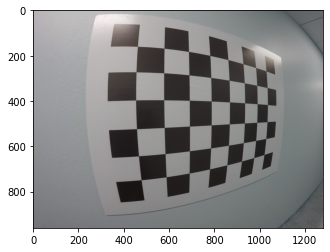

In [95]:
# %matplotlib qt
%matplotlib inline
plt.imshow(img)

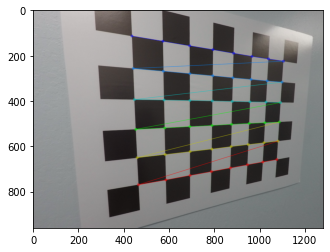

In [96]:
# %matplotlib qt
plt.imshow(undistort_img)

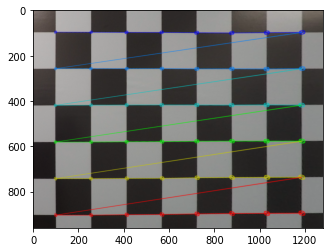

In [97]:
plt.imshow(top_down)